In [1]:
%load_ext autoreload
%autoreload 2

from pcurve import PrincipalCurve
import numpy as np
from matplotlib import pyplot as plt

(1000, 2)


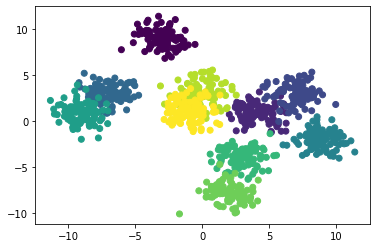

In [20]:
load=True
num_cells = 1000
num_dims_reduced = 2
num_branches = 2
K = 10 # cluster labels
if num_branches == 2:
    filename = 'fakedata-2branch.npy'
    start_node = 5
else:
    filename = 'fakedata-1branch.npy'
    start_node = 4

if load:
    data = np.load(filename, allow_pickle=True).item()
    cluster_labels = data['cluster_labels']
    data = data['data'].numpy()
else:
    cluster_labels = np.zeros([num_cells], dtype=int)
    data = list()
    for k in range(K):
        cells = num_cells // K
        offset = torch.randint(20, torch.Size([2])) - 10
        print(offset.shape)

        data.append(offset + torch.randn(torch.Size([num_cells//K, num_dims_reduced])))
        cluster_labels[k*cells:(k+1)*cells] = k
    data = torch.cat(data)
    np.save(filename, dict(data=data, cluster_labels=cluster_labels))
plt.scatter(data[:, 0], data[:, 1], c=cluster_labels)

cluster_labels_onehot = np.zeros((cluster_labels.shape[0], cluster_labels.max()+1))
cluster_labels_onehot[np.arange(cluster_labels.shape[0]), cluster_labels] = 1

print(data.shape)

In [2]:
from project_to_curve_converted import project_to_curve

t = np.random.uniform(-1, 1, 100)
x = np.stack([t, t**2], axis=1) + np.random.normal(0, 0.05, (100, 2))
x[:, 0] += 1
# x = data
plt.scatter(x[:, 0], x[:, 1], s=5, label='data')
cluster_centres = np.stack([data[cluster_labels == k].mean(axis=0) for k in range(10)])
s = np.array([[0., 1., 2.], [1., 0., 1.]]).T
# s = cluster_centres
plt.scatter(s[:, 0], s[:, 1], label='curve points')

# Try original
curve = PrincipalCurve(k=3)
curve.fit(x, p=s, max_iter=1)
# plt.scatter(curve.points[:, 0], curve.points[:, 1], label='curve.points')
p_interp = curve.points_interp
# plt.scatter(p_interp[:, 0], p_interp[:, 1], label='curve.p_interp')
from scipy.interpolate import interp1d
p_interps = list()
# for j in range(p_interp.shape[1]):
#     interp = interp1d(curve.pseudotimes_interp, x[:, j], kind='cubic')
#     p_interps.append(interp(curve.pseudotimes_interp[curve.order]))
# p_interp = np.stack(p_interps, axis=1)
# plt.plot(p_interp[:, 0], p_interp[:, 1])

# curve, dist_ind, dist = curve._project_to_curve(x, s)
# p_interp = curve.points_interp
# plt.scatter(p_interp[:, 0], p_interp[:, 1], label='original p_interp', s=10, alpha=0.5, color='red')

# Try new
curve, dist_ind, dist = curve.project_to_curve(x, s)
pseudotime_interp = curve.pseudotimes_interp
print('s_interp', pseudotime_interp)
p_interp = curve.points_interp
# plt.scatter(p_interp[:, 0], p_interp[:, 1], label='p_interp')
# plt.plot(curve.points[:, 0], curve.points[:, 1])
plt.scatter(p_interp[:, 0], p_interp[:, 1], label='new p_interp', s=10, alpha=0.5, color='black')

s_interp, p_interp, order, dist_ind, dist = project_to_curve(x, s)
plt.scatter(p_interp[:, 0], p_interp[:, 1], label='neww p_interp', s=10, alpha=0.5, color='red')

print('s_interp 2', s_interp)
for i in range(10):
    path_from = (x[i][0], p_interp[i][0])
    path_to = (x[i][1], p_interp[i][1])
    plt.plot(path_from, path_to, c='black', alpha=pseudotime_interp[i])

plt.legend()


NameError: name 'np' is not defined

In [9]:
print(dist_ind.shape)

(100,)


In [36]:
diff = points[1:] - points[:-1]  # first difference
# denominator = np.power(np.linalg.norm(diff, axis=1), 2)
length = np.square(diff).sum(axis=1)
for i in range(X.shape[0]): # for each point
    z = X[i, :]  # z is the vector of the dimensions for the point
    numerator = diff.T * np.einsum('ij,ij->i', z - points[:-1], diff)  # multiply and sum along second axis
    seg_proj = (numerator / length).T  # compute parallel component
    proj_dist = (z - points[:-1]) - seg_proj  # compute perpendicular component
    dist_endpts = np.minimum(np.linalg.norm(z - points[0:-1], axis=1), np.linalg.norm(z - points[1:], axis = 1))
    dist_seg = np.maximum(np.linalg.norm(proj_dist, axis=1), dist_endpts)

    idx_min = np.argmin(dist_seg)
    q = seg_proj[idx_min]
    t_diff = pseudotimes[idx_min + 1] - pseudotimes[idx_min]
    x_diff = points[idx_min + 1, :] - points[idx_min, :]
    s_interp[i] = (np.linalg.norm(q) / np.linalg.norm(x_diff)) * t_diff + pseudotimes[idx_min]
    p_interp[i] = (s_interp[i] - pseudotimes[idx_min]) * x_diff + points[idx_min, :]

    n_test = points[:-1] + seg_proj
    w = np.square(n_test - z).sum(axis=1)
    print(w)
    p_interp[i] =
    d_sq.append(np.linalg.norm(proj_dist[idx_min])**2)

SyntaxError: invalid syntax (<ipython-input-36-698b7ab0ffc3>, line 22)

(100, 2) (3, 2)


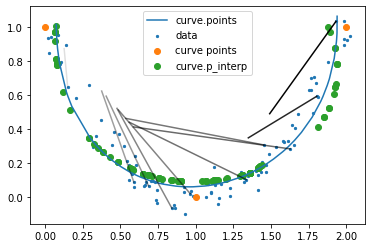

In [26]:
t = np.random.uniform(-1, 1, 100)
x = np.stack([t, t**2], axis=1) + np.random.normal(0, 0.05, (100, 2))
x[:, 0] += 1
plt.scatter(x[:, 0], x[:, 1], s=5, label='data')
s = np.array([[0, 1, 2], [1, 0, 1]]).T
print(x.shape, s.shape)
plt.scatter(s[:, 0], s[:, 1], label='curve points')
curve = PrincipalCurve(k=3)

curve.fit(x, p=s, max_iter=2)
plt.scatter(curve.points_interp[:, 0], curve.points_interp[:, 1], label='curve.p_interp')
plt.plot(curve.points[:, 0], curve.points[:, 1], label='curve.points')
s, p_interp, d = curve.project_to_curve(x, s)
# plt.scatter(p_interp[:, 0], p_interp[:, 1], label='p_interp')
# plt.plot(curve.points[:, 0], curve.points[:, 1])
for i in range(10):
    path_from = (x[i][0], p_interp[i][0])
    path_to = (x[i][1], p_interp[i][1])
    plt.plot(path_from, path_to, c='black', alpha=s[i])

plt.legend()

